In [62]:
%reload_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

from pathlib import Path
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Increase the resolution of all the plots below
plt.rcParams.update({"figure.dpi": 300,"figure.facecolor":"w","figure.figsize": (15,10)})

from src.utl import remove_outliers_df, nan_pearsonr
from src.config import dir_prep, dir_plots_group_cmpr, cfg_colors


In [64]:
# set colors for plotting 
cc_low = cfg_colors["group_colors"][0]
cc_high = cfg_colors["group_colors"][1]

## set path and merge data

In [3]:
dat_pupil = pd.read_csv(Path.joinpath(dir_prep,"all_trials_pupil.csv"), index_col=False)
dat_fsr = pd.read_csv(Path.joinpath(dir_prep,"all_trials_fsr.csv"), index_col=False)

list(dat_pupil.columns)

['ID',
 'Trial n',
 'Feedback type',
 'Feedback angle',
 'Pupil size',
 'Percentage bad pupil samples',
 'Group']

In [4]:
full = pd.merge(dat_fsr, dat_pupil, on=["ID","Trial n","Group","Feedback type","Feedback angle"])
full = full.loc[:,~full.columns.str.startswith('Unnamed')]
list(full.columns)

['ID',
 'Trial n',
 'Feedback type',
 'Feedback angle',
 'Power [4-12]',
 'Power [1-3]',
 'Group',
 'Pupil size',
 'Percentage bad pupil samples']

In [8]:
print(full["ID"].unique())
full.head(5)

['c301' 'c303' 'c304' 'c305' 'c306' 'c307' 'c308' 'c309' 'c310' 'p200'
 'p201' 'p202' 'p203' 'p204' 'p205' 'p206' 'p207' 'p208' 'p209' 'p210'
 'p211' 'p212' 'p213' 'p214' 'p215']


,ID,Trial n,Feedback type,Feedback angle,Power [4-12],Power [1-3],Group,Pupil size,Percentage bad pupil samples
0,c301,0,vo,low,1.540146e-07,0.000076,c,-0.070480,4.272727
1,c301,1,vo,low,1.912623e-07,0.000081,c,-0.188177,4.318182
2,c301,2,vo,high,5.067292e-07,0.000076,c,-0.412544,4.090909
3,c301,3,vo,high,5.259912e-07,0.000095,c,-0.308365,5.818182
4,c301,4,va,low,3.472883e-07,0.000080,c,-0.135686,36.136364


## evaluate differences between angles and get correlation

In [36]:
cfg_out_ppl_per = 70
clean_eye = full.copy()

clean_eye = clean_eye.loc[clean_eye["Percentage bad pupil samples"] < cfg_out_ppl_per,:]
clean_eye = clean_eye[['ID','Group', 'Feedback type', 'Feedback angle','Power [4-12]','Pupil size']]

clean_eye_pat = clean_eye[clean_eye["Group"] == 'p']
clean_eye_hc = clean_eye[clean_eye["Group"] == 'c']

# Patient data

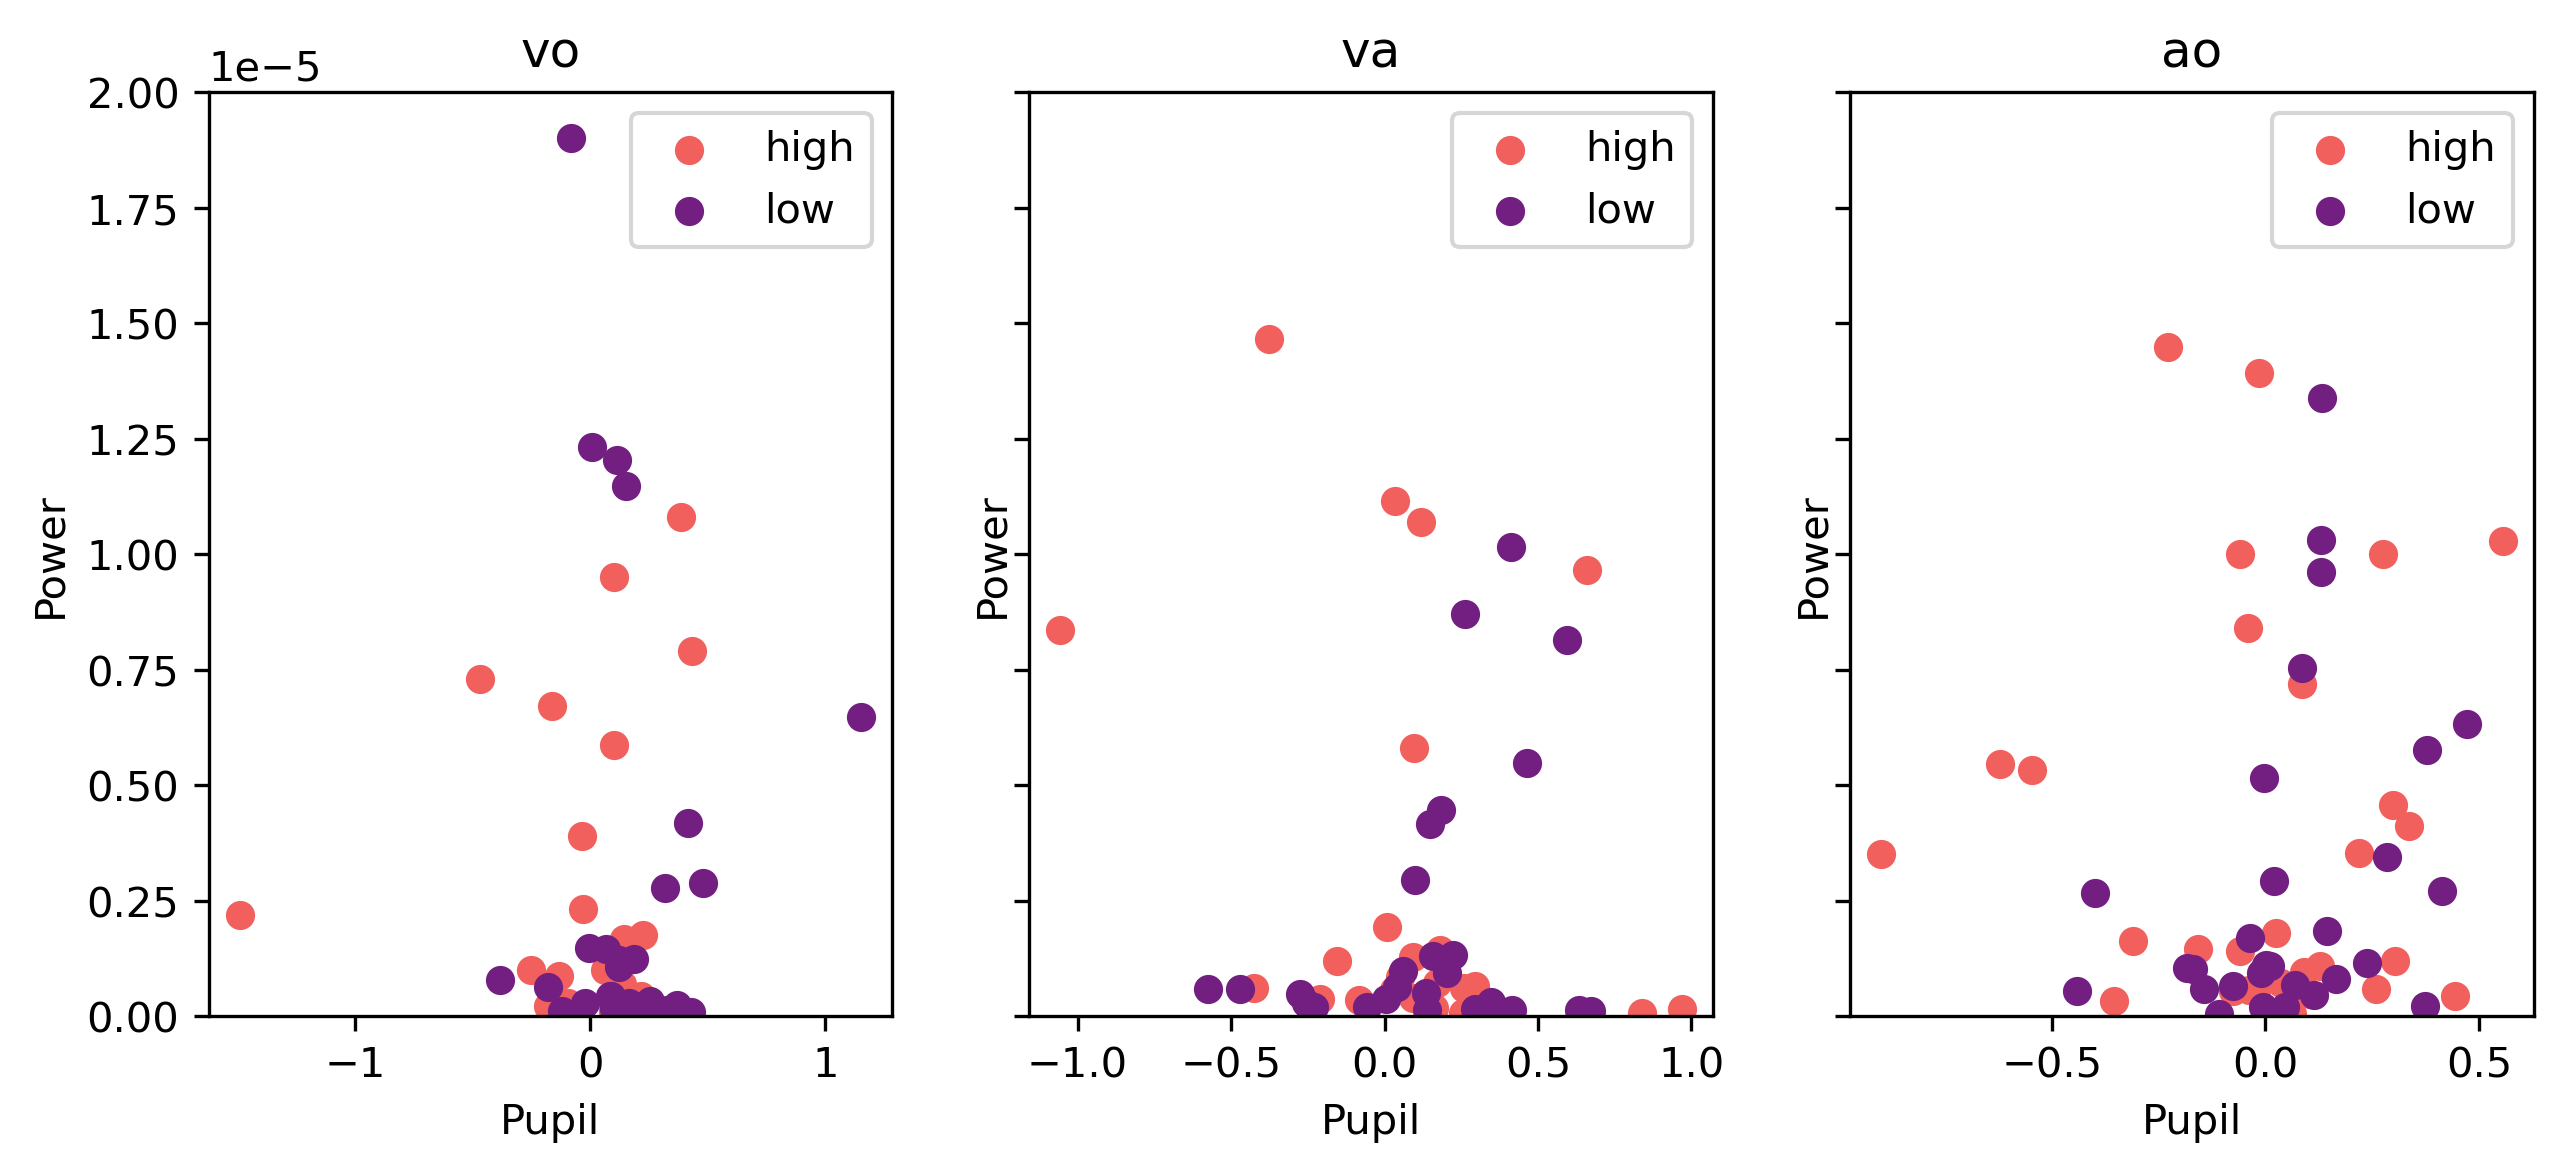

In [70]:
fdb_type = ['vo','va','ao']
fig, axs = plt.subplots(1,3, sharey= True, figsize = [10,4])

for i,t in enumerate(fdb_type):
    pup_c_low = clean_eye_pat["Pupil size"][np.logical_and(clean_eye_pat["Feedback type"] == t, clean_eye_pat["Feedback angle"] == 'low')]
    pup_c_high = clean_eye_pat["Pupil size"][np.logical_and(clean_eye_pat["Feedback type"] == t, clean_eye_pat["Feedback angle"] == 'high')]

    pow_c_low = clean_eye_pat["Power [4-12]"][np.logical_and(clean_eye_pat["Feedback type"] == t, clean_eye_pat["Feedback angle"] == 'low')]
    pow_c_high = clean_eye_pat["Power [4-12]"][np.logical_and(clean_eye_pat["Feedback type"] == t, clean_eye_pat["Feedback angle"] == 'high')]

    r_low, p_low = nan_pearsonr(pup_c_low, pow_c_low)
    r_high, p_high = nan_pearsonr(pup_c_high, pow_c_high)

    if p_high < 0.05 or p_low < 0.05:
        print(f"For {t} the correlation for low was r={r_low:.2f}, p={p_low:.2f}")
        print(f"For {t} the correlation for high was r={r_high:.2f}, p={p_high:.2f}")

    axs[i].scatter(pup_c_high,pow_c_high, label = 'high', color = cc_high)
    axs[i].scatter(pup_c_low,pow_c_low, label = 'low', color = cc_low)
    axs[i].legend()

    axs[i].set_title(t)
    axs[i].set_ylabel("Power")
    axs[i].set_xlabel("Pupil")
    axs[i].set_ylim([0,0.00002])


# Healthy control data

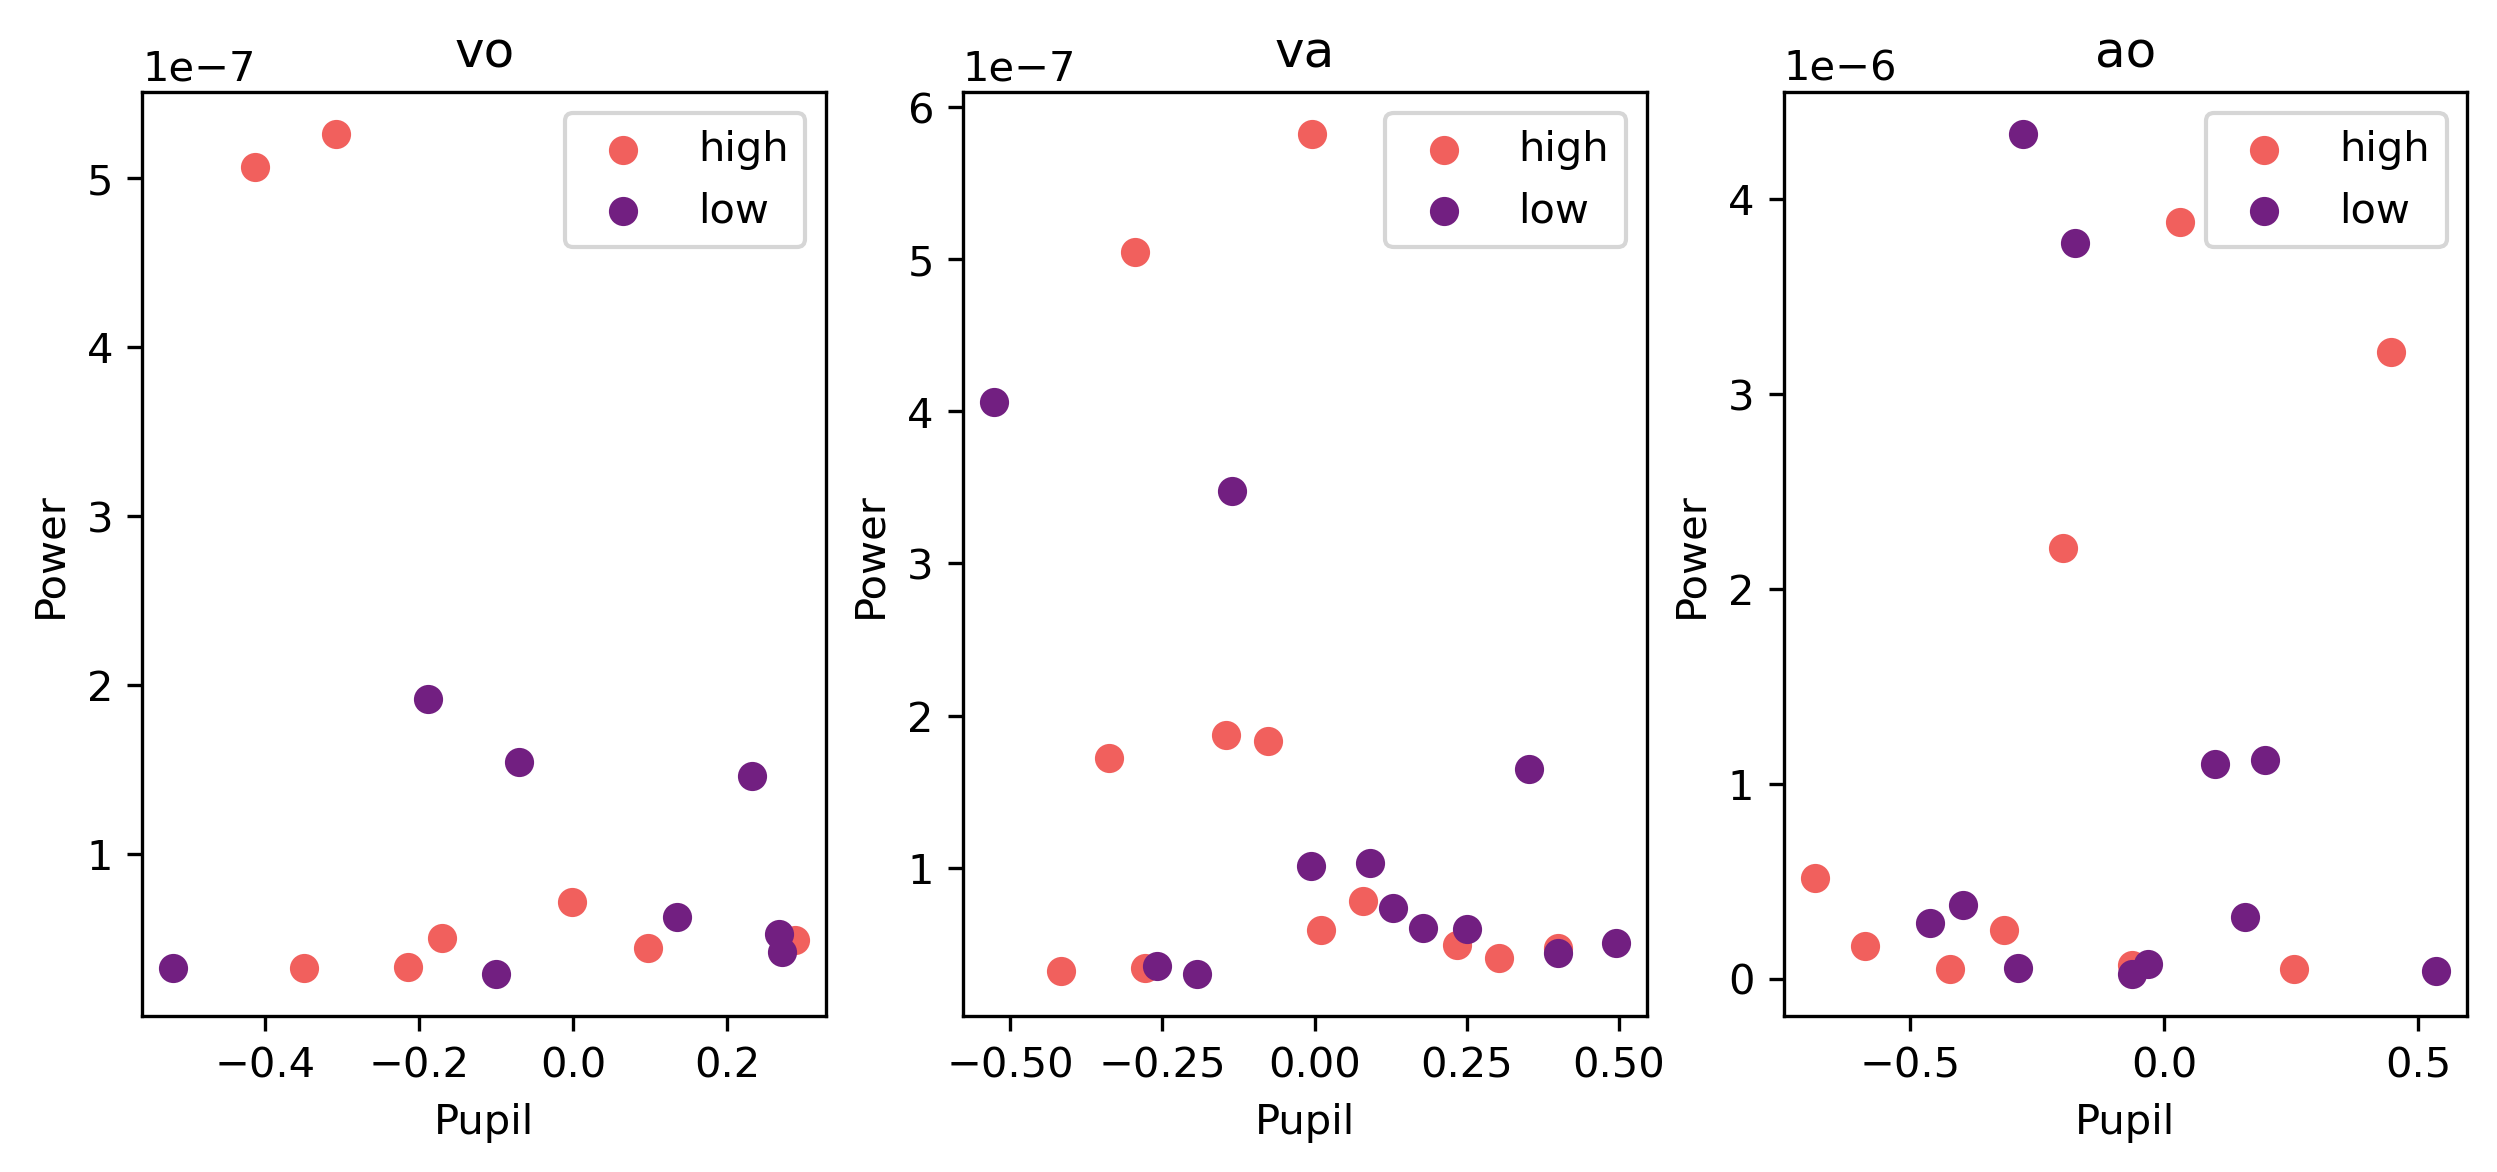

In [71]:
fdb_type = ['vo','va','ao']
fig, axs = plt.subplots(1,3, figsize = [10,4])

for i,t in enumerate(fdb_type):
    pup_c_low = clean_eye_hc["Pupil size"][np.logical_and(clean_eye_hc["Feedback type"] == t, clean_eye_hc["Feedback angle"] == 'low')]
    pup_c_high = clean_eye_hc["Pupil size"][np.logical_and(clean_eye_hc["Feedback type"] == t, clean_eye_hc["Feedback angle"] == 'high')]

    pow_c_low = clean_eye_hc["Power [4-12]"][np.logical_and(clean_eye_hc["Feedback type"] == t, clean_eye_hc["Feedback angle"] == 'low')]
    pow_c_high = clean_eye_hc["Power [4-12]"][np.logical_and(clean_eye_hc["Feedback type"] == t, clean_eye_hc["Feedback angle"] == 'high')]

    r_low, p_low = nan_pearsonr(pup_c_low, pow_c_low)
    r_high, p_high = nan_pearsonr(pup_c_high, pow_c_high)

    if p_high < 0.05 or p_low < 0.05:
        print(f"For {t} the correlation for low was r={r_low:.2f}, p={p_low:.2f}")
        print(f"For {t} the correlation for high was r={r_high:.2f}, p={p_high:.2f}")

    axs[i].scatter(pup_c_high,pow_c_high, label = 'high', color = cc_high)
    axs[i].scatter(pup_c_low,pow_c_low, label = 'low', color = cc_low)
    axs[i].legend()

    axs[i].set_title(t)
    axs[i].set_ylabel("Power")
    axs[i].set_xlabel("Pupil")